In [1]:
import pandas as pd
df_main = pd.read_csv("/content/UIC DS Project Dataset - uicdsprojectfinal.csv")
df_main.head()

,state,county,lat,lon,total_population,percent_fair_or_poor_health,percent_low_birthweight,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_uninsured,high_school_graduation_rate,percent_some_college,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,annual_average_violent_crimes,injury_death_rate,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,inadequate_facilities,child_mortality_rate,percent_food_insecure,percent_limited_access_to_healthy_foods,average_grade_performance,median_household_income,percent_enrolled_in_free_or_reduced_lunch,percent_less_than_18_years_of_age,percent_not_proficient_in_english,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_overcrowding
0,Alabama,Autauga,32.534928,-86.642748,55049,20.882987,8.619529,7.2,34.7,69.130124,8.721686,90.000000,62.009974,3.629079,19.3,110026.0,21019.0,5.234597,148.5,68.526994,False,14.663462,12.826718,1.346154,55.922156,13.2,11.991125,2.959586,59338.0,43.408673,23.674035,0.820225,26168.0,12.3,12.4,1.2
1,Alabama,Baldwin,30.727489,-87.722575,199510,17.509134,8.345003,8.0,26.5,73.713549,11.333404,86.361577,67.371620,3.615382,13.9,111447.0,25227.0,4.417767,408.0,72.385054,False,13.566201,12.277388,0.479042,47.381750,11.6,5.424427,3.005642,57588.0,48.486565,21.607911,0.543517,28069.0,13.0,10.0,1.3
2,Alabama,Barbour,31.869589,-85.393213,26614,29.591802,11.474559,5.6,23.5,53.166770,12.242792,81.410256,34.857649,5.171384,43.9,76557.0,13475.0,5.681410,105.5,70.274612,False,14.583333,13.445946,0.603070,74.225274,22.0,10.739667,2.660388,34382.0,63.292302,20.867328,1.631683,17249.0,26.4,26.2,1.7
3,Alabama,Bibb,32.998634,-87.126480,22572,19.439724,10.308710,7.8,33.5,16.251364,10.206253,83.763838,44.137353,3.971828,27.8,87957.0,20134.0,4.368581,19.5,108.156028,False,10.496454,9.978277,0.709220,85.800086,14.3,2.601627,2.628688,46064.0,61.562116,20.477679,0.268210,18988.0,16.5,19.3,0.3
4,Alabama,Blount,33.980878,-86.567383,57704,21.745293,7.604563,8.4,30.3,15.634486,13.360759,93.468795,53.361073,3.511157,18.0,91702.0,20699.0,4.430262,279.0,107.285369,False,10.548012,7.851446,1.091174,83.798883,10.7,2.880150,3.025407,50412.0,52.906287,23.153527,1.724520,21033.0,16.5,20.0,1.9


In [2]:
df_tax = pd.read_csv('/content/Illinois County Sales Tax - Sheet1 (2).csv')
df_tax

,County Name,Tax Rate WO P,Tax Rate W P
0,Adams County,8.00%,8.00
1,Alexander County,6.25%,6.25
2,Bond County,7.75%,7.75
3,Boone County,8.25%,8.25
4,Brown County,7.50%,7.50
...,...,...,...
97,Whiteside County,8.25%,8.25
98,Will County,9.00%,9.00
99,Williamson County,9.50%,9.50
100,Winnebago County,8.75%,8.75


In [3]:
df_illinois = df_main[df_main['state']=='Illinois']
df_illinois

,state,county,lat,lon,total_population,percent_fair_or_poor_health,percent_low_birthweight,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_uninsured,high_school_graduation_rate,percent_some_college,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,annual_average_violent_crimes,injury_death_rate,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,inadequate_facilities,child_mortality_rate,percent_food_insecure,percent_limited_access_to_healthy_foods,average_grade_performance,median_household_income,percent_enrolled_in_free_or_reduced_lunch,percent_less_than_18_years_of_age,percent_not_proficient_in_english,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_overcrowding
595,Illinois,Adams,39.987878,-91.188535,66949,14.772518,7.669462,8.3,27.6,81.886056,5.236587,91.510770,68.068298,3.882285,15.9,97200.0,23003.0,4.225536,229.0,87.818492,True,10.994860,9.388283,1.046256,61.705747,11.1,3.171018,2.793094,55174.0,53.601993,22.497755,0.189385,26053.0,12.9,8.3,1.0
596,Illinois,Alexander,37.191525,-89.337567,7051,24.272540,8.319468,5.4,22.6,58.351542,6.365125,92.547115,41.541756,7.942406,44.5,63894.0,14944.0,4.275562,92.0,105.660377,False,17.554241,14.411883,0.946746,NaN,22.2,12.507657,2.209063,35249.0,91.545894,23.069307,0.098814,16067.0,33.5,25.0,3.1
597,Illinois,Bond,38.886840,-89.435560,17137,15.598467,8.903468,8.4,24.9,62.719496,6.612252,91.731825,61.999520,4.376340,18.3,106225.0,23908.0,4.443073,6.5,89.812222,False,13.636364,9.709061,1.570248,NaN,11.1,2.713725,2.976486,54800.0,46.548673,19.446783,0.207000,23660.0,16.5,12.1,2.6
598,Illinois,Boone,42.323061,-88.823365,53656,15.614342,6.663339,8.8,26.6,88.837810,7.501940,91.256328,58.533451,5.753031,13.5,123282.0,29596.0,4.165495,91.5,55.214198,False,13.854931,11.729241,0.190166,27.636015,7.7,4.813579,2.835316,74507.0,43.233434,24.792355,3.616651,27825.0,11.1,13.9,2.5
599,Illinois,Brown,39.961834,-90.750351,6836,15.601501,6.521739,7.5,23.2,75.695546,3.624733,92.500000,48.670213,2.693370,14.8,100946.0,23893.0,4.224919,6.5,53.420389,False,7.746479,6.347703,0.000000,NaN,10.9,13.059176,2.718619,55327.0,84.520548,15.878585,0.734375,21822.0,11.7,14.1,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,Illinois,Whiteside,41.756280,-89.914116,57155,14.541292,5.982122,8.4,26.0,71.886218,5.978433,87.545332,61.705039,4.573878,17.1,96898.0,25163.0,3.850813,106.0,71.925877,False,10.187154,8.705933,0.723097,43.865771,8.8,7.162979,NaN,57197.0,50.160239,21.932190,1.002200,26155.0,11.4,11.3,1.3
693,Illinois,Will,41.445029,-87.978562,685378,14.617555,7.456262,8.8,22.8,96.989197,6.262618,91.345371,69.063600,4.042539,8.6,149626.0,38057.0,3.931629,1103.5,49.112579,False,14.718172,12.792914,0.597884,38.660691,7.2,5.735384,3.015087,86108.0,37.276760,24.865017,3.233020,32311.0,7.7,9.2,2.0
694,Illinois,Williamson,37.730258,-88.929927,67336,15.461639,8.436815,8.1,28.8,76.498335,5.385702,83.932640,67.195889,5.136009,20.0,95002.0,20597.0,4.612419,40.0,89.174777,True,10.557844,9.500379,0.580307,64.472345,12.0,4.465321,3.112893,46187.0,49.927403,21.845920,0.676007,25238.0,14.9,9.8,1.1
695,Illinois,Winnebago,42.336264,-89.160850,288896,18.423558,8.803954,7.7,24.7,90.842833,7.397314,79.382023,59.781783,5.733165,27.2,101040.0,22173.0,4.556894,2522.5,95.431055,True,15.489939,13.315000,1.255468,74.032463,12.7,7.342493,2.845209,53795.0,48.387457,23.405296,2.229696,26187.0,15.5,12.6,1.9


In [4]:
df_illinois['county'] = df_illinois['county'].astype(str)+' County' 
df_illinois=df_illinois.reset_index(drop=True)
df_illinois.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,state,county,lat,lon,total_population,percent_fair_or_poor_health,percent_low_birthweight,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_uninsured,high_school_graduation_rate,percent_some_college,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,annual_average_violent_crimes,injury_death_rate,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,inadequate_facilities,child_mortality_rate,percent_food_insecure,percent_limited_access_to_healthy_foods,average_grade_performance,median_household_income,percent_enrolled_in_free_or_reduced_lunch,percent_less_than_18_years_of_age,percent_not_proficient_in_english,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_overcrowding
0,Illinois,Adams County,39.987878,-91.188535,66949,14.772518,7.669462,8.3,27.6,81.886056,5.236587,91.510770,68.068298,3.882285,15.9,97200.0,23003.0,4.225536,229.0,87.818492,True,10.994860,9.388283,1.046256,61.705747,11.1,3.171018,2.793094,55174.0,53.601993,22.497755,0.189385,26053.0,12.9,8.3,1.0
1,Illinois,Alexander County,37.191525,-89.337567,7051,24.272540,8.319468,5.4,22.6,58.351542,6.365125,92.547115,41.541756,7.942406,44.5,63894.0,14944.0,4.275562,92.0,105.660377,False,17.554241,14.411883,0.946746,NaN,22.2,12.507657,2.209063,35249.0,91.545894,23.069307,0.098814,16067.0,33.5,25.0,3.1
2,Illinois,Bond County,38.886840,-89.435560,17137,15.598467,8.903468,8.4,24.9,62.719496,6.612252,91.731825,61.999520,4.376340,18.3,106225.0,23908.0,4.443073,6.5,89.812222,False,13.636364,9.709061,1.570248,NaN,11.1,2.713725,2.976486,54800.0,46.548673,19.446783,0.207000,23660.0,16.5,12.1,2.6
3,Illinois,Boone County,42.323061,-88.823365,53656,15.614342,6.663339,8.8,26.6,88.837810,7.501940,91.256328,58.533451,5.753031,13.5,123282.0,29596.0,4.165495,91.5,55.214198,False,13.854931,11.729241,0.190166,27.636015,7.7,4.813579,2.835316,74507.0,43.233434,24.792355,3.616651,27825.0,11.1,13.9,2.5
4,Illinois,Brown County,39.961834,-90.750351,6836,15.601501,6.521739,7.5,23.2,75.695546,3.624733,92.500000,48.670213,2.693370,14.8,100946.0,23893.0,4.224919,6.5,53.420389,False,7.746479,6.347703,0.000000,NaN,10.9,13.059176,2.718619,55327.0,84.520548,15.878585,0.734375,21822.0,11.7,14.1,2.7


In [70]:

df_illinois=df_illinois.reset_index(drop=True)
df_illinois.head()
newDf = pd.merge(df_illinois, df_tax, right_index=True, left_index=True)

df_illinois_closer = df_illinois[df_illinois['lat']>40.5]
df_illinois_closer = df_illinois_closer[df_illinois_closer['lat']<42]

df_illinois_closer = df_illinois_closer[df_illinois_closer['lon']<-87.5]
df_illinois_closer = df_illinois_closer[df_illinois_closer['lon']>-90]


df_illinois_closer = df_illinois_closer.reset_index(drop=True)
df_illinois_closer
newDf

,state,county,lat,lon,total_population,percent_fair_or_poor_health,percent_low_birthweight,food_environment_index,percent_physically_inactive,percent_with_access_to_exercise_opportunities,percent_uninsured,high_school_graduation_rate,percent_some_college,percent_unemployed_CHR,percent_children_in_poverty,eightieth_percentile_income,twentieth_percentile_income,income_ratio,annual_average_violent_crimes,injury_death_rate,presence_of_water_violation,percent_severe_housing_problems,severe_housing_cost_burden,inadequate_facilities,child_mortality_rate,percent_food_insecure,percent_limited_access_to_healthy_foods,average_grade_performance,median_household_income,percent_enrolled_in_free_or_reduced_lunch,percent_less_than_18_years_of_age,percent_not_proficient_in_english,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,percent_overcrowding,County Name,Tax Rate WO P,Tax Rate W P
0,Illinois,Adams County,39.987878,-91.188535,66949,14.772518,7.669462,8.3,27.6,81.886056,5.236587,91.510770,68.068298,3.882285,15.9,97200.0,23003.0,4.225536,229.0,87.818492,True,10.994860,9.388283,1.046256,61.705747,11.1,3.171018,2.793094,55174.0,53.601993,22.497755,0.189385,26053.0,12.9,8.3,1.0,Adams County,8.00%,8.00
1,Illinois,Alexander County,37.191525,-89.337567,7051,24.272540,8.319468,5.4,22.6,58.351542,6.365125,92.547115,41.541756,7.942406,44.5,63894.0,14944.0,4.275562,92.0,105.660377,False,17.554241,14.411883,0.946746,NaN,22.2,12.507657,2.209063,35249.0,91.545894,23.069307,0.098814,16067.0,33.5,25.0,3.1,Alexander County,6.25%,6.25
2,Illinois,Bond County,38.886840,-89.435560,17137,15.598467,8.903468,8.4,24.9,62.719496,6.612252,91.731825,61.999520,4.376340,18.3,106225.0,23908.0,4.443073,6.5,89.812222,False,13.636364,9.709061,1.570248,NaN,11.1,2.713725,2.976486,54800.0,46.548673,19.446783,0.207000,23660.0,16.5,12.1,2.6,Bond County,7.75%,7.75
3,Illinois,Boone County,42.323061,-88.823365,53656,15.614342,6.663339,8.8,26.6,88.837810,7.501940,91.256328,58.533451,5.753031,13.5,123282.0,29596.0,4.165495,91.5,55.214198,False,13.854931,11.729241,0.190166,27.636015,7.7,4.813579,2.835316,74507.0,43.233434,24.792355,3.616651,27825.0,11.1,13.9,2.5,Boone County,8.25%,8.25
4,Illinois,Brown County,39.961834,-90.750351,6836,15.601501,6.521739,7.5,23.2,75.695546,3.624733,92.500000,48.670213,2.693370,14.8,100946.0,23893.0,4.224919,6.5,53.420389,False,7.746479,6.347703,0.000000,NaN,10.9,13.059176,2.718619,55327.0,84.520548,15.878585,0.734375,21822.0,11.7,14.1,2.7,Brown County,7.50%,7.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Illinois,Whiteside County,41.756280,-89.914116,57155,14.541292,5.982122,8.4,26.0,71.886218,5.978433,87.545332,61.705039,4.573878,17.1,96898.0,25163.0,3.850813,106.0,71.925877,False,10.187154,8.705933,0.723097,43.865771,8.8,7.162979,NaN,57197.0,50.160239,21.932190,1.002200,26155.0,11.4,11.3,1.3,Whiteside County,8.25%,8.25
98,Illinois,Will County,41.445029,-87.978562,685378,14.617555,7.456262,8.8,22.8,96.989197,6.262618,91.345371,69.063600,4.042539,8.6,149626.0,38057.0,3.931629,1103.5,49.112579,False,14.718172,12.792914,0.597884,38.660691,7.2,5.735384,3.015087,86108.0,37.276760,24.865017,3.233020,32311.0,7.7,9.2,2.0,Will County,9.00%,9.00
99,Illinois,Williamson County,37.730258,-88.929927,67336,15.461639,8.436815,8.1,28.8,76.498335,5.385702,83.932640,67.195889,5.136009,20.0,95002.0,20597.0,4.612419,40.0,89.174777,True,10.557844,9.500379,0.580307,64.472345,12.0,4.465321,3.112893,46187.0,49.927403,21.845920,0.676007,25238.0,14.9,9.8,1.1,Williamson County,9.50%,9.50
100,Illinois,Winnebago County,42.336264,-89.160850,288896,18.423558,8.803954,7.7,24.7,90.842833,7.397314,79.382023,59.781783,5.733165,27.2,101040.0,22173.0,4.556894,2522.5,95.431055,True,15.489939,13.315000,1.255468,74.032463,12.7,7.342493,2.845209,53795.0,48.387457,23.405296,2.229696,26187.0,15.5,12.6,1.9,Winnebago County,8.75%,8.75


In [71]:
newDf = newDf[newDf['lat']>40.5]
newDf = newDf[newDf['lat']<42.5]

newDf = newDf[newDf['lon']<-87.5]
newDf = newDf[newDf['lon']>-90]

newDf = newDf.reset_index(drop=True)

del newDf['County Name']
del newDf['state']
del newDf['percent_with_access_to_exercise_opportunities']
del newDf['percent_overcrowding']
del newDf['Tax Rate WO P']
del newDf['percent_low_birthweight']
del newDf['eightieth_percentile_income']
del newDf['twentieth_percentile_income']
del newDf['income_ratio']
del newDf['percent_less_than_18_years_of_age']
del newDf['percent_physically_inactive']
del newDf['severe_housing_cost_burden']
del newDf['child_mortality_rate']
del newDf['injury_death_rate']
del newDf['percent_uninsured']
del newDf['percent_unemployed_CHR']
del newDf['food_environment_index']
del newDf['annual_average_violent_crimes']
del newDf['percent_severe_housing_problems']
del newDf['inadequate_facilities']
del newDf['percent_food_insecure']
del newDf['percent_limited_access_to_healthy_foods']
del newDf['percent_enrolled_in_free_or_reduced_lunch']
del newDf['percent_fair_or_poor_health']
del newDf['average_grade_performance']
del newDf['presence_of_water_violation']



newDf

,county,lat,lon,total_population,high_school_graduation_rate,percent_some_college,percent_children_in_poverty,median_household_income,percent_not_proficient_in_english,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,Tax Rate W P
0,Boone County,42.323061,-88.823365,53656,91.256328,58.533451,13.5,74507.0,3.616651,27825.0,11.1,13.9,8.25
1,Bureau County,41.404152,-89.528679,33822,83.994395,58.384146,17.1,56099.0,1.264223,27332.0,13.1,9.3,8.00
2,Carroll County,42.068695,-89.934397,14793,93.571915,57.065949,17.0,51963.0,0.384281,27325.0,11.4,9.3,6.50
3,Cook County,41.840039,-87.816716,5227575,88.180003,70.540772,18.8,63347.0,7.028652,32179.0,16.7,14.2,11.00
4,DeKalb County,41.893548,-88.770324,104458,89.926627,74.648266,13.2,63274.0,1.515661,25172.0,18.2,7.4,6.75
5,DuPage County,41.851955,-88.085639,930514,94.307007,78.397037,7.9,93540.0,3.723422,40547.0,7.0,7.6,10.00
6,Ford County,40.597200,-88.223272,13758,84.907000,64.006623,15.9,55357.0,0.323778,25524.0,14.0,11.2,6.25
7,Grundy County,41.285113,-88.418492,50338,93.817420,66.508278,8.3,79348.0,0.882471,30232.0,9.8,7.1,6.25
8,Iroquois County,40.747250,-87.824357,28814,94.021289,57.360490,16.6,55247.0,1.225591,25562.0,16.1,11.3,7.25
9,Kane County,41.938889,-88.428647,526615,88.103083,61.926219,11.9,79834.0,6.990260,31774.0,11.0,16.9,9.00


In [72]:
df_taxFinal = newDf[['county','Tax Rate W P']]
df_taxFinal

,county,Tax Rate W P
0,Boone County,8.25
1,Bureau County,8.00
2,Carroll County,6.50
3,Cook County,11.00
4,DeKalb County,6.75
5,DuPage County,10.00
6,Ford County,6.25
7,Grundy County,6.25
8,Iroquois County,7.25
9,Kane County,9.00


In [79]:
newDf[(newDf['county'] == 'Cook County') & (newDf['county'] == 'DuPage County') & (newDf['county'] == 'Kane County') & (newDf['county'] == 'Lake County') & (newDf['county'] == 'Will County')]

df_collars = newDf[(newDf['county'] == 'Cook County')]

df_collars = pd.concat([newDf[(newDf['county'] == 'Kane County')], df_collars], ignore_index=True)
df_collars = pd.concat([newDf[(newDf['county'] == 'Lake County')], df_collars], ignore_index=True)
df_collars = pd.concat([newDf[(newDf['county'] == 'Will County')], df_collars], ignore_index=True)
df_collars = pd.concat([newDf[(newDf['county'] == 'DuPage County')], df_collars], ignore_index=True)
df_collars = pd.concat([newDf[(newDf['county'] == 'McHenry County')], df_collars], ignore_index=True)
df_collars




,county,lat,lon,total_population,high_school_graduation_rate,percent_some_college,percent_children_in_poverty,median_household_income,percent_not_proficient_in_english,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,Tax Rate W P
0,McHenry County,42.324471,-88.452358,307083,93.090277,70.464739,7.8,86268.0,2.466045,34589.0,7.8,7.4,8.25
1,DuPage County,41.851955,-88.085639,930514,94.307007,78.397037,7.9,93540.0,3.723422,40547.0,7.0,7.6,10.00
2,Will County,41.445029,-87.978562,685378,91.345371,69.063600,8.6,86108.0,3.233020,32311.0,7.7,9.2,9.00
3,Lake County,42.323378,-88.003631,702890,90.943451,69.374588,10.3,87336.0,4.837146,40655.0,8.9,10.2,7.50
4,Kane County,41.938889,-88.428647,526615,88.103083,61.926219,11.9,79834.0,6.990260,31774.0,11.0,16.9,9.00
5,Cook County,41.840039,-87.816716,5227575,88.180003,70.540772,18.8,63347.0,7.028652,32179.0,16.7,14.2,11.00


In [80]:
df_outside = newDf[(newDf['county'] == 'Grundy County')]
df_outside = pd.concat([newDf[(newDf['county'] == 'Kankakee County')], df_outside], ignore_index=True)

df_outside = pd.concat([newDf[(newDf['county'] == 'Boone County')], df_outside], ignore_index=True)
df_outside = pd.concat([newDf[(newDf['county'] == 'Kendall County')], df_outside], ignore_index=True)
df_outside = pd.concat([newDf[(newDf['county'] == 'DeKalb County')], df_outside], ignore_index=True)
df_outside

,county,lat,lon,total_population,high_school_graduation_rate,percent_some_college,percent_children_in_poverty,median_household_income,percent_not_proficient_in_english,per_capita_income,percent_below_poverty,percent_no_highschool_diploma,Tax Rate W P
0,DeKalb County,41.893548,-88.770324,104458,89.926627,74.648266,13.2,63274.0,1.515661,25172.0,18.2,7.4,6.75
1,Kendall County,41.590546,-88.428841,121452,95.267104,72.793165,5.4,93345.0,2.971187,31920.0,5.4,6.8,8.50
2,Boone County,42.323061,-88.823365,53656,91.256328,58.533451,13.5,74507.0,3.616651,27825.0,11.1,13.9,8.25
3,Kankakee County,41.137717,-87.861831,111493,93.163779,60.437121,20.2,53884.0,1.347172,25111.0,15.7,12.7,8.25
4,Grundy County,41.285113,-88.418492,50338,93.817420,66.508278,8.3,79348.0,0.882471,30232.0,9.8,7.1,6.25


In [93]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 500)
pd.set_option('display.max_colwidth', 150)
pd.set_option('display.width', 90)
pd.set_option('expand_frame_repr', True)



In [94]:
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d3fb72f90>,
      dtype=object)

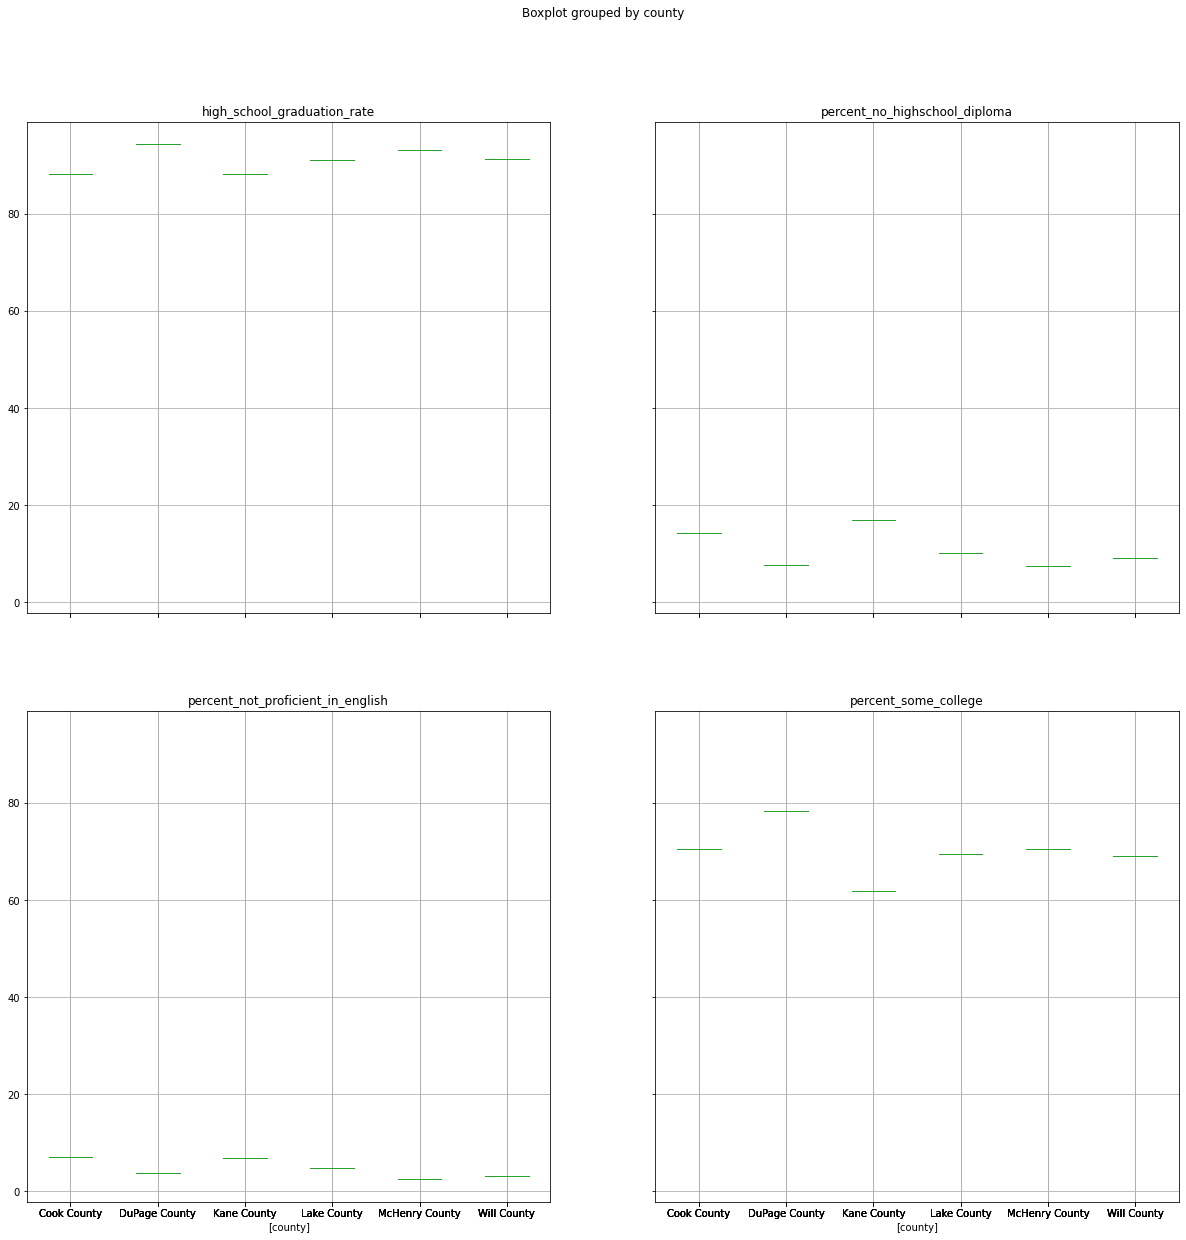

In [98]:
plot_data1 = df_collars
plot_data1 = plot_data1[['county', 'high_school_graduation_rate', 'percent_some_college', 'percent_not_proficient_in_english', 'percent_no_highschool_diploma']]
plot_data1

plot_data1.boxplot(by='county', grid=True, figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d402f0f90>,
      dtype=object)

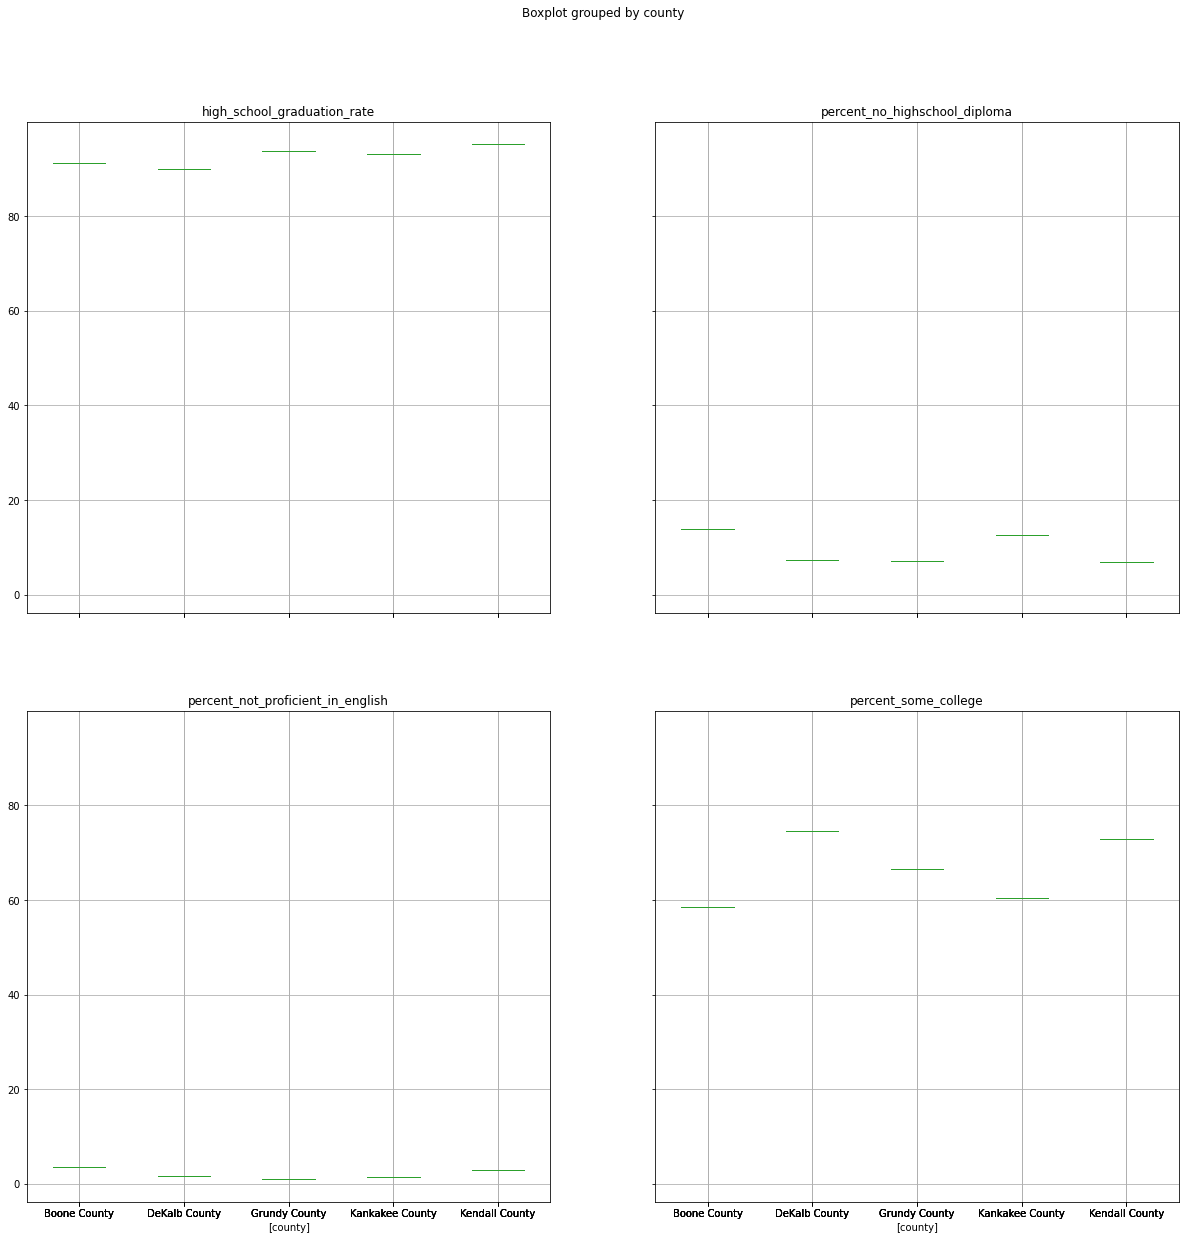

In [96]:
plot_data2 = df_outside
plot_data2 = plot_data2[['county', 'high_school_graduation_rate', 'percent_some_college', 'percent_not_proficient_in_english', 'percent_no_highschool_diploma']]
plot_data2

plot_data2.boxplot(by='county', grid=True, figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d3e8d1490>,
      dtype=object)

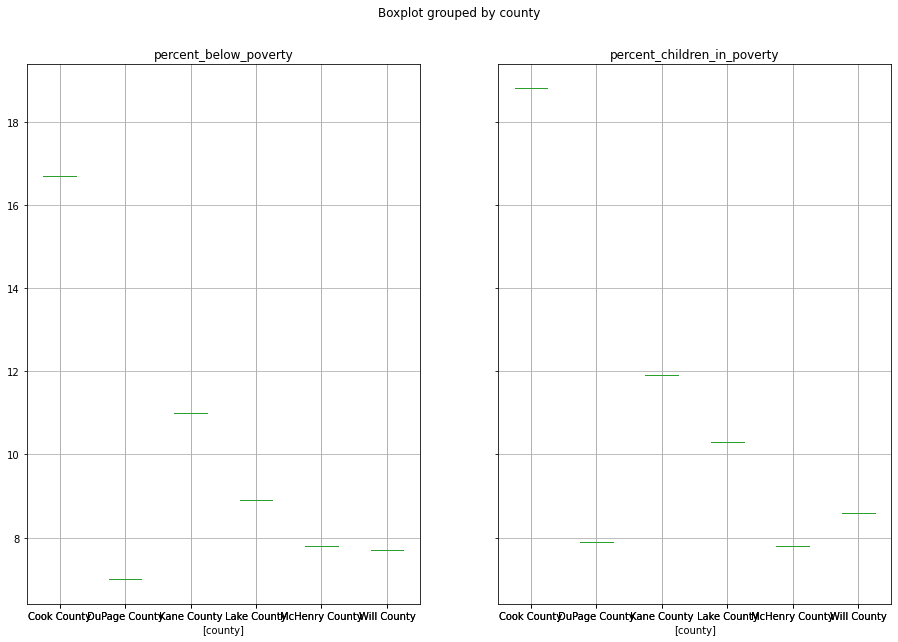

In [106]:
plot_data3 = df_collars
plot_data3 = plot_data3[['county', 'percent_children_in_poverty', 'percent_below_poverty']]
plot_data3

plot_data3.boxplot(by='county', grid=True, figsize=(15,10))



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d3e436990>,
      dtype=object)

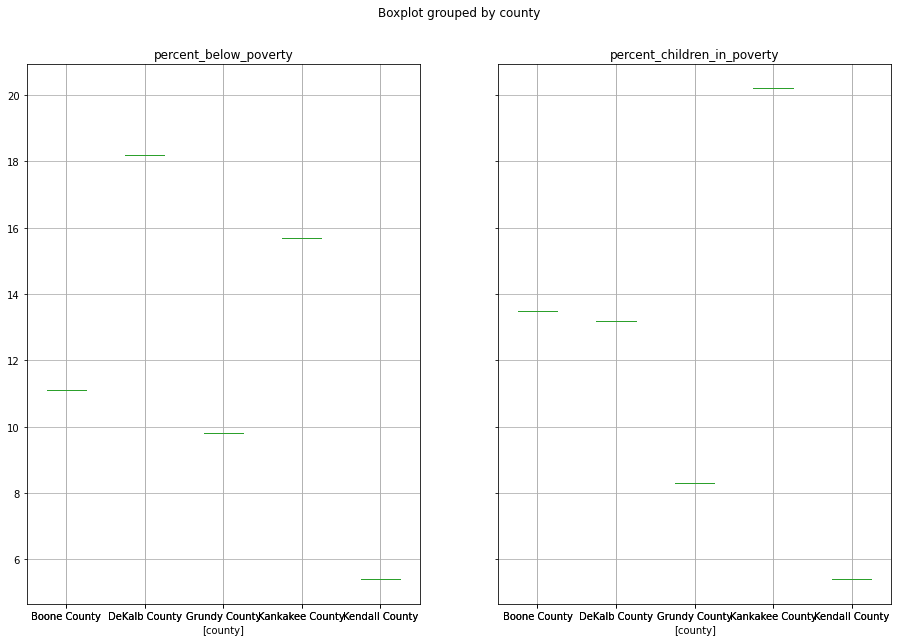

In [109]:
plot_data4 = df_outside
plot_data4 = plot_data4[['county', 'percent_children_in_poverty', 'percent_below_poverty']]
plot_data4

plot_data4.boxplot(by='county', grid=True, figsize=(15,10))



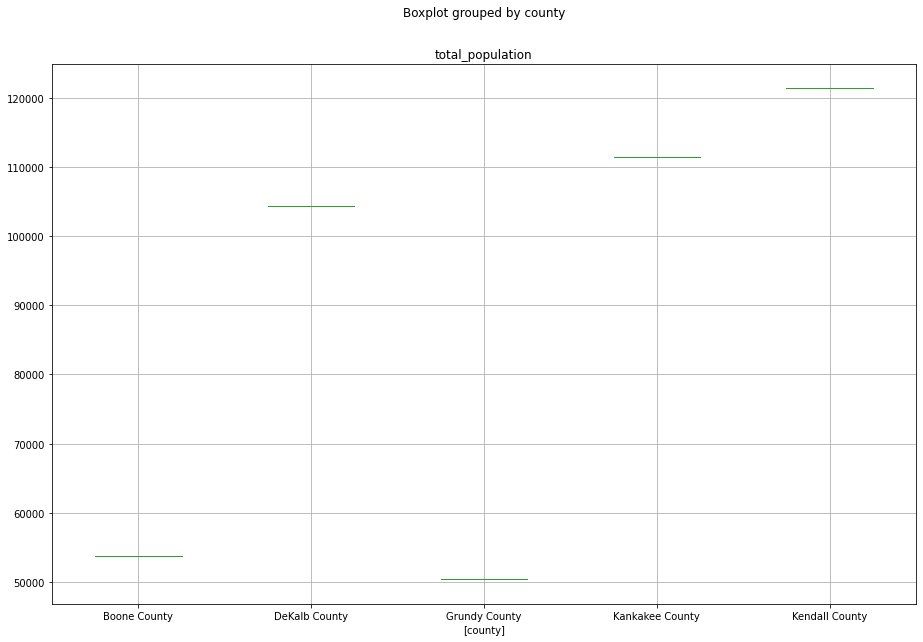

In [111]:
plot_data5 = df_outside
plot_data5 = plot_data5[['county', 'total_population']]
plot_data5

plot_data5.boxplot(by='county', grid=True, figsize=(15,10))

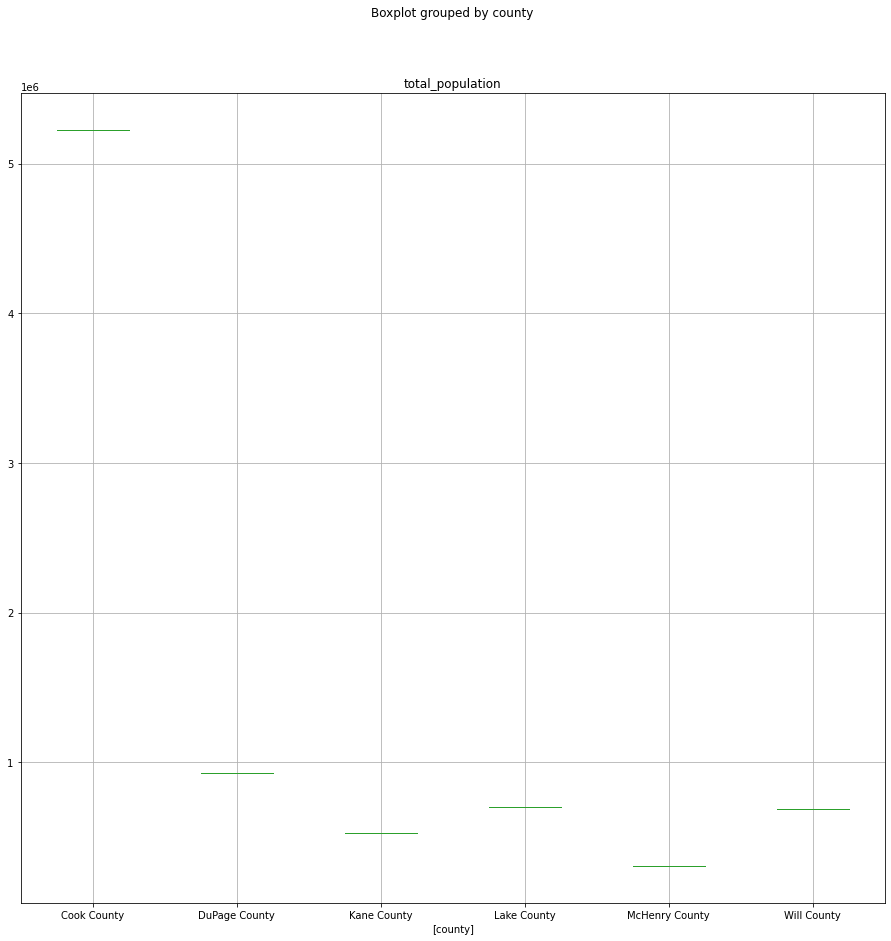

In [115]:
plot_data6 = df_collars
plot_data6 = plot_data6[['county', 'total_population']]
plot_data6

plot_data6.boxplot(by='county', grid=True, figsize=(15,15))